In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import load_iris

Начнём с простого - создайте Decision Tree классификатор, используя одноимённый класс из библиотеки sklearn и сохраните его в переменную dt.

﻿У дерева должны быть следующие параметры:
 
максимальная глубина - 5 уровней

минимальное число образцов в вершине для разделения - 5

In [28]:
heart_disease = pd.read_csv('C:\\Users\\UserOfPC\\Documents\\Основы Data Science Stepik\\Датасеты\\train_data_tree.csv')

In [21]:
heart_disease # num - есть или нет у пациента заболевание сердца, наличие/отсутсвие стенокардии (exang)

,sex,exang,num
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,0
4,1,0,1
...,...,...,...
233,1,0,0
234,1,1,0
235,1,0,1
236,1,1,1


In [29]:
c

In [30]:
X = heart_disease.drop('num', axis=1)

In [31]:
y = heart_disease.num

In [32]:
dt.fit(X, y)  

DecisionTreeClassifier(criterion='entropy')

[Text(0.5, 0.8333333333333334, 'exang <= 0.5\nentropy = 0.996\nsamples = 238\nvalue = [128, 110]\nclass = Have_disease'),
 Text(0.25, 0.5, 'sex <= 0.5\nentropy = 0.903\nsamples = 157\nvalue = [107, 50]\nclass = Have_disease'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.612\nsamples = 53\nvalue = [45, 8]\nclass = Have_disease'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.973\nsamples = 104\nvalue = [62, 42]\nclass = Have_disease'),
 Text(0.75, 0.5, 'sex <= 0.5\nentropy = 0.826\nsamples = 81\nvalue = [21, 60]\nclass = No_disease'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.954\nsamples = 16\nvalue = [6, 10]\nclass = No_disease'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.779\nsamples = 65\nvalue = [15, 50]\nclass = No_disease')]

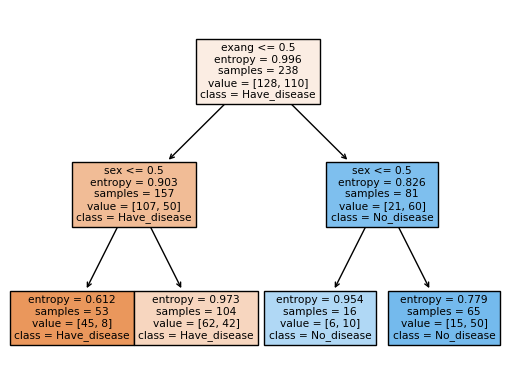

In [33]:
tree.plot_tree(dt, feature_names=list(X),class_names=['Have_disease', 'No_disease'], filled=True)

Укажите, чему будет равняться значение Information Gain для переменной,  которая будет помещена в корень дерева.

In [34]:
information_gane = 0.996 - ((157/238)*0.903 + (81/238)*0.826)

In [35]:
information_gane

0.11920588235294116

###### ___________________________________________________________________________________

##### Ирисы

In [39]:
iris = load_iris()

In [40]:
X = iris.data

In [41]:
y = iris.target

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)  

In [43]:
dt = tree.DecisionTreeClassifier()

In [44]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [45]:
predicted = dt.predict(X_test)

In [46]:
predicted

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

Теперь задание - осуществите перебор всех деревьев на данных ириса по следующим параметрам:
максимальная глубина - от 1 до 10 уровней
минимальное число проб для разделения - от 2 до 10
минимальное число проб в листе - от 1 до 10
и сохраните в переменную best_tree лучшее дерево. Переменную с GridSearchCV назовите search

In [49]:
# Создадим словарь с параметрами, которые хотим "потюнить"
parametrs = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 10), 'min_samples_split': range(2, 10), 'min_samples_leaf': range(1, 10)}

In [50]:
search = GridSearchCV(dt, parametrs, cv=5)

In [61]:
search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10)})

In [62]:
search.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 3}

In [63]:
best_tree = search.best_estimator_

##### RandomizedSearchCV

In [66]:
search = RandomizedSearchCV(dt, parametrs, cv=5)

In [67]:
search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 10),
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(2, 10)})

In [68]:
search.best_params_

{'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_depth': 9,
 'criterion': 'gini'}

In [69]:
best_tree = search.best_estimator_